# 📎LSTM using IMDB Datasets

## PyTorch

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5 - Loss: 0.5905, Accuracy: 0.6813
Epoch 2/5 - Loss: 0.4963, Accuracy: 0.7644
Epoch 3/5 - Loss: 0.4006, Accuracy: 0.8216
Epoch 4/5 - Loss: 0.3057, Accuracy: 0.8751
Epoch 5/5 - Loss: 0.2412, Accuracy: 0.9077

Evaluasi pada Test Set:
Accuracy : 0.86204
Precision: 0.8732986884434546
Recall   : 0.84696
F1 Score : 0.8599277098647606
AUC      : 0.926153616


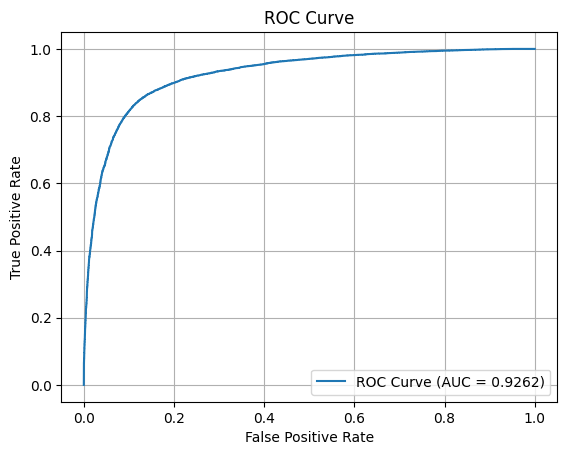

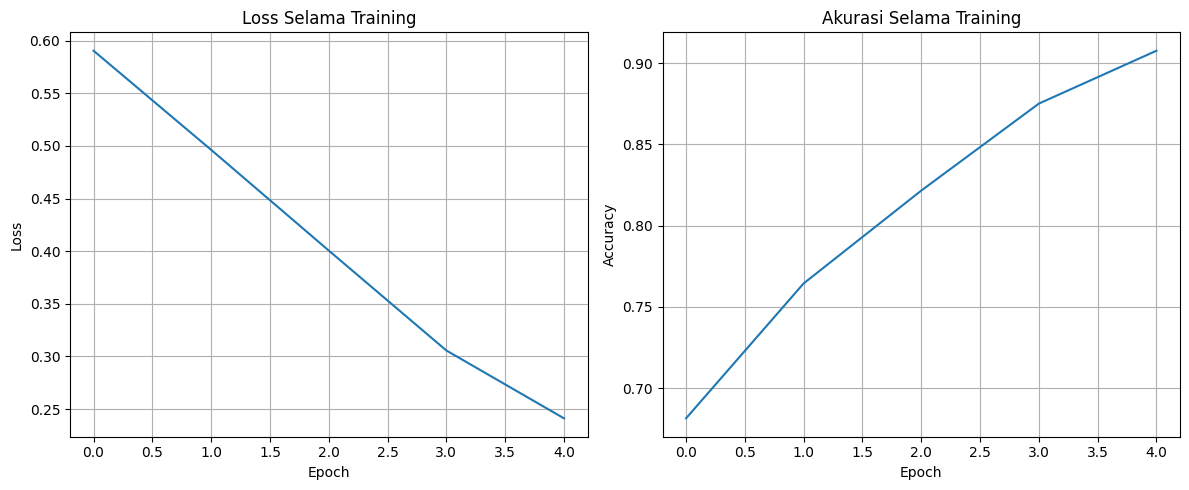

In [1]:
# 1. Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

import numpy as np

# 2. Load dan Preprocess Data
NUM_WORDS = 30000
MAXLEN = 300

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=NUM_WORDS)

x_train = pad_sequences(x_train, maxlen=MAXLEN)
x_test = pad_sequences(x_test, maxlen=MAXLEN)

x_train = torch.LongTensor(x_train)
y_train = torch.FloatTensor(y_train)

x_test = torch.LongTensor(x_test)
y_test = torch.FloatTensor(y_test)

batch_size = 64
train_data = TensorDataset(x_train, y_train)
test_data = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

# 3. Definisikan Model LSTM
class TextLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(TextLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        last_hidden = lstm_out[:, -1, :]
        out = self.fc(last_hidden)
        return self.sigmoid(out).squeeze()

# 4. Setup Model, Loss, Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TextLSTM(vocab_size=NUM_WORDS, embedding_dim=128, hidden_dim=128, output_dim=1).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 5. Training Loop
epochs = 5
train_losses, train_accuracies = [], []

for epoch in range(epochs):
    model.train()
    total_loss, total_acc = 0, 0

    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        optimizer.zero_grad()
        preds = model(batch_x)
        loss = criterion(preds, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_acc += ((preds > 0.5).float() == batch_y).sum().item()

    avg_loss = total_loss / len(train_loader)
    avg_acc = total_acc / len(x_train)

    train_losses.append(avg_loss)
    train_accuracies.append(avg_acc)

    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}, Accuracy: {avg_acc:.4f}")

# 6. Evaluasi Model
model.eval()
all_preds, all_targets = [], []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x = batch_x.to(device)
        preds = model(batch_x).cpu().numpy()
        all_preds.extend(preds)
        all_targets.extend(batch_y.numpy())

pred_labels = (np.array(all_preds) > 0.5).astype(int)
true_labels = np.array(all_targets)

print("\nEvaluasi pada Test Set:")
print("Accuracy :", accuracy_score(true_labels, pred_labels))
print("Precision:", precision_score(true_labels, pred_labels))
print("Recall   :", recall_score(true_labels, pred_labels))
print("F1 Score :", f1_score(true_labels, pred_labels))
print("AUC      :", roc_auc_score(true_labels, all_preds))

# 7. Kurva ROC
fpr, tpr, _ = roc_curve(true_labels, all_preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.4f})'.format(roc_auc_score(true_labels, all_preds)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# 8. Visualisasi Akurasi dan Loss
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.title("Loss Selama Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.title("Akurasi Selama Training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


## TensorFlow

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - accuracy: 0.7014 - loss: 0.5530 - val_accuracy: 0.7568 - val_loss: 0.4980
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 444s 1s/step - accuracy: 0.8938 - loss: 0.2672 - val_accuracy: 0.8699 - val_loss: 0.3454
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - accuracy: 0.9436 - loss: 0.1549 - val_accuracy: 0.8666 - val_loss: 0.3622
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.9714 - loss: 0.0856 - val_accuracy: 0.8280 - val_loss: 0.4695
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 444s 1s/step - accuracy: 0.9799 - loss: 0.0609 - val_accuracy: 0.8425 - val_loss: 0.4876
391/391 ━━━━━━━━━━━━━━━━━━━━ 94s 240ms/step

Evaluasi pada Test Set:
Accuracy : 0.84248
Precision: 0.8654601331739799
Recall   : 0.81104
F1 Score : 0.8373668125877591
AUC      : 0.9120094784000001


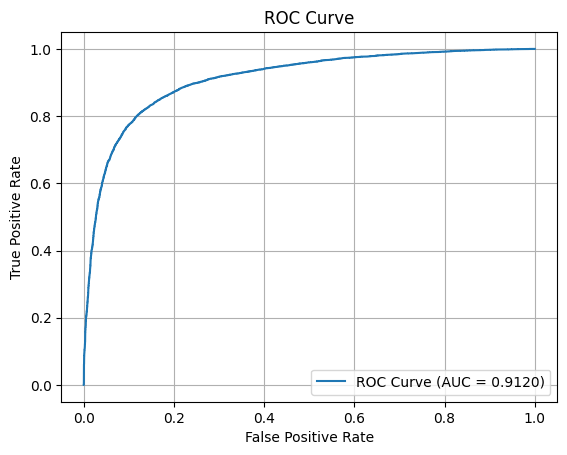

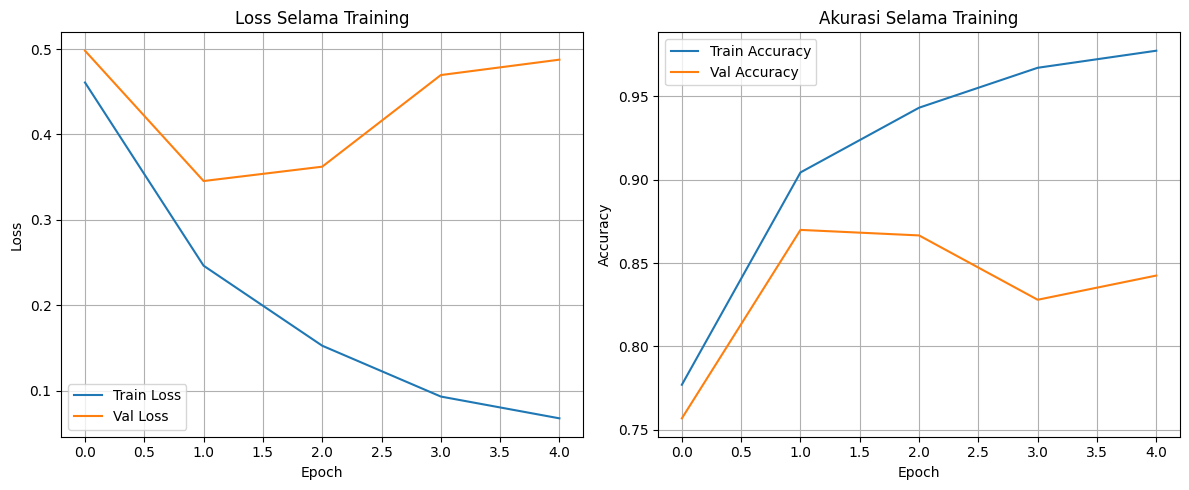

In [2]:
# 1. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# 2. Load dan Preprocess Data
NUM_WORDS = 30000
MAXLEN = 300
BATCH_SIZE = 64

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=NUM_WORDS)

x_train = pad_sequences(x_train, maxlen=MAXLEN)
x_test = pad_sequences(x_test, maxlen=MAXLEN)

# 3. Definisikan Model LSTM
model = Sequential([
    Embedding(input_dim=NUM_WORDS, output_dim=128, input_length=MAXLEN),
    LSTM(units=128),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 4. Train Model
EPOCHS = 5

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)

# 5. Evaluasi Model
y_pred_probs = model.predict(x_test, batch_size=BATCH_SIZE).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

print("\nEvaluasi pada Test Set:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("AUC      :", roc_auc_score(y_test, y_pred_probs))

# 6. Kurva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_probs):.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# 7. Visualisasi Akurasi dan Loss
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Selama Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Akurasi Selama Training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
